<a href="https://colab.research.google.com/github/MykhailoKononov/facebook_ads_performance_analysis/blob/main/facebook_ads_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
!wget https://raw.githubusercontent.com/MykhailoKononov/facebook_ads_performance_analysis/main/facebook_ads_data.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

--2024-11-12 17:27:27--  https://raw.githubusercontent.com/MykhailoKononov/facebook_ads_performance_analysis/main/facebook_ads_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141907 (139K) [text/plain]
Saving to: ‘facebook_ads_data.csv.1’

facebook_ads_data.c 100%[===================>] 138.58K  --.-KB/s    in 0.02s   

2024-11-12 17:27:27 (6.93 MB/s) - ‘facebook_ads_data.csv.1’ saved [141907/141907]



In [3]:
# Load data from CSV file
data = pd.read_csv('facebook_ads_data.csv')
df = pd.DataFrame(data)

# Task: Analyze daily spend and ROMI trends for the year 2021

In [4]:
# Convert the 'ad_date' column to datetime format
df['ad_date'] = pd.to_datetime(df['ad_date'], format='%Y-%m-%d')

In [5]:
# Filter data for the year 2021
ad_2021 = df[df['ad_date'].dt.year == 2021]

In [6]:
# Group data by date and calculate daily spend and average daily ROMI
daily_spend = ad_2021.groupby('ad_date', as_index=False)['total_spend'].sum()
daily_romi = ad_2021.groupby('ad_date', as_index=False)['romi'].mean()

In [7]:
# Calculate 5-day rolling averages for spend and ROMI
daily_spend['rolling_spend'] = daily_spend['total_spend'].rolling(5).mean()
daily_romi['rolling_romi'] = daily_romi['romi'].rolling(5).mean()

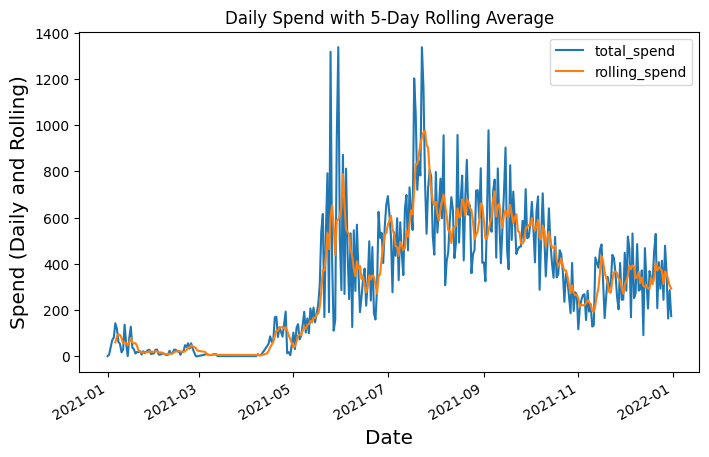

In [8]:
# Plot daily spend with 5-day rolling average
daily_spend.plot('ad_date', ['total_spend','rolling_spend'], kind='line', figsize=[8, 5], title='Daily Spend with 5-Day Rolling Average')
plt.style.use('classic')
plt.xlabel('Date', fontsize='large')
plt.ylabel('Spend (Daily and Rolling)', fontsize='large')
plt.show()

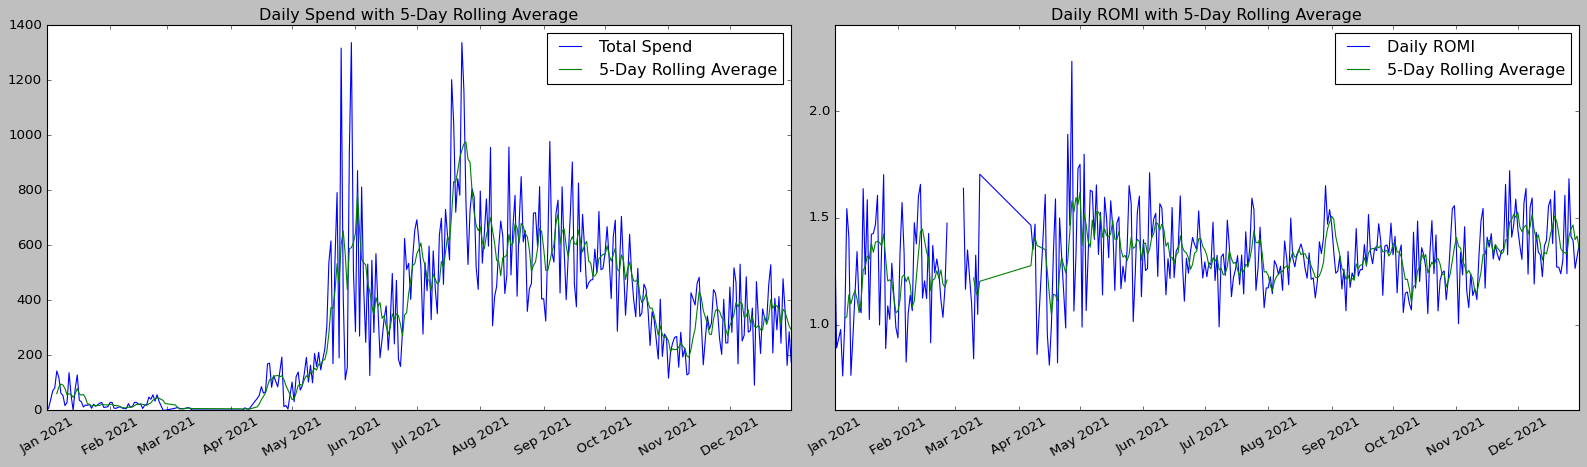

In [9]:
# Combined plot for spend and ROMI trends
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
ax[0].plot(daily_spend['ad_date'], daily_spend['total_spend'], label='Total Spend')
ax[0].plot(daily_spend['ad_date'], daily_spend['rolling_spend'], label='5-Day Rolling Average')
ax[0].set_title('Daily Spend with 5-Day Rolling Average')
ax[0].tick_params(axis='x', rotation=30)
ax[0].legend()

ax[1].plot(daily_romi['ad_date'], daily_romi['romi'], label='Daily ROMI')
ax[1].plot(daily_romi['ad_date'], daily_romi['rolling_romi'], label='5-Day Rolling Average')
ax[1].set_title('Daily ROMI with 5-Day Rolling Average')
ax[1].tick_params(axis='x', rotation=30)
ax[1].legend()

plt.tight_layout()
plt.show()

# Task: Analyze campaign-level spend and ROMI performance

In [10]:
# Group data by campaign name and calculate total spend and average ROMI
spend_campaign = df.groupby('campaign_name', as_index=False)['total_spend'].sum()
romi_campaign = df.groupby('campaign_name', as_index=False)['romi'].mean()

In [11]:
# Print grouped data for inspection
print(spend_campaign)
print(romi_campaign)

      campaign_name  total_spend
0             Brand       539.92
1   Crazy discounts      2175.29
2         Discounts      2856.39
3       Electronics     23920.42
4         Expansion     67212.82
5           Hobbies     11326.97
6         Lookalike     63631.09
7         New items      2936.97
8            Promos      4993.84
9            Trendy      1992.31
10        Wholesale     14181.71
      campaign_name      romi
0             Brand  1.241293
1   Crazy discounts  1.208851
2         Discounts  1.247111
3       Electronics  1.225274
4         Expansion  1.237941
5           Hobbies  1.238967
6         Lookalike  1.245056
7         New items  1.279135
8            Promos  1.751932
9            Trendy  1.840145
10        Wholesale  1.239026


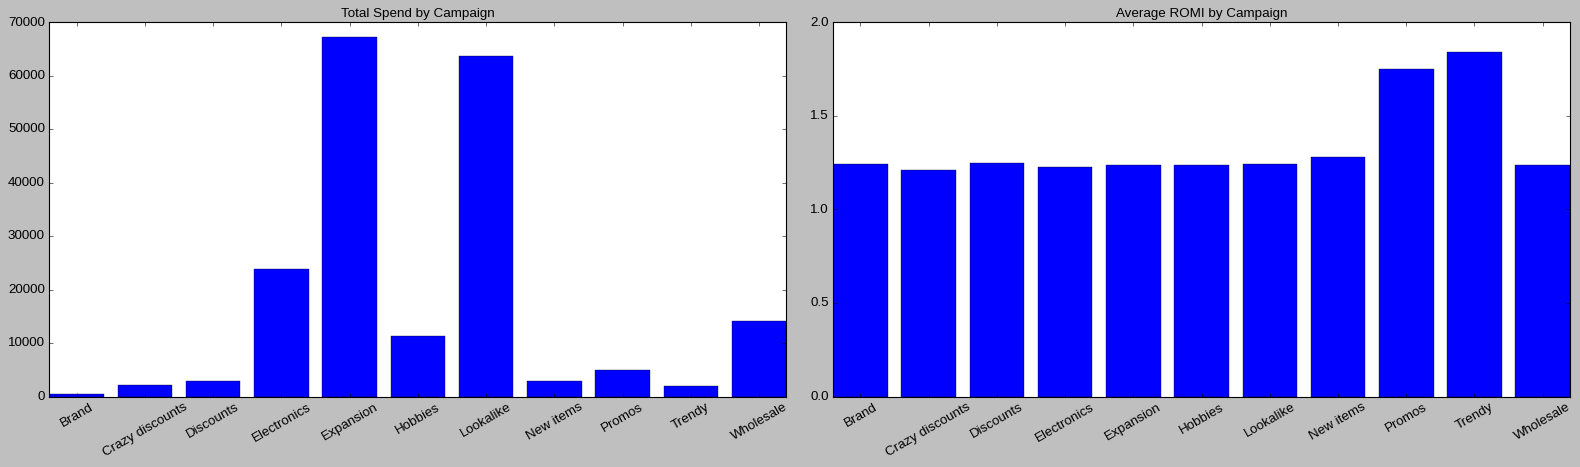

In [12]:
# Bar plots for total spend and average ROMI by campaign
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
plt.style.use('seaborn-v0_8')
ax[0].bar(spend_campaign['campaign_name'], spend_campaign['total_spend'], label='Total Spend')
ax[0].set_title('Total Spend by Campaign')
ax[0].tick_params(axis='x', rotation=30, labelsize='medium')
ax[0].tick_params(axis='y', labelsize='medium')

ax[1].bar(romi_campaign['campaign_name'], romi_campaign['romi'], label='Average ROMI')
ax[1].set_title('Average ROMI by Campaign')
ax[1].tick_params(axis='x', rotation=30, labelsize='medium')
ax[1].tick_params(axis='y', labelsize='medium')

plt.tight_layout()
plt.show()

# Task: Visualize the distribution of daily ROMI per campaign using a box plot

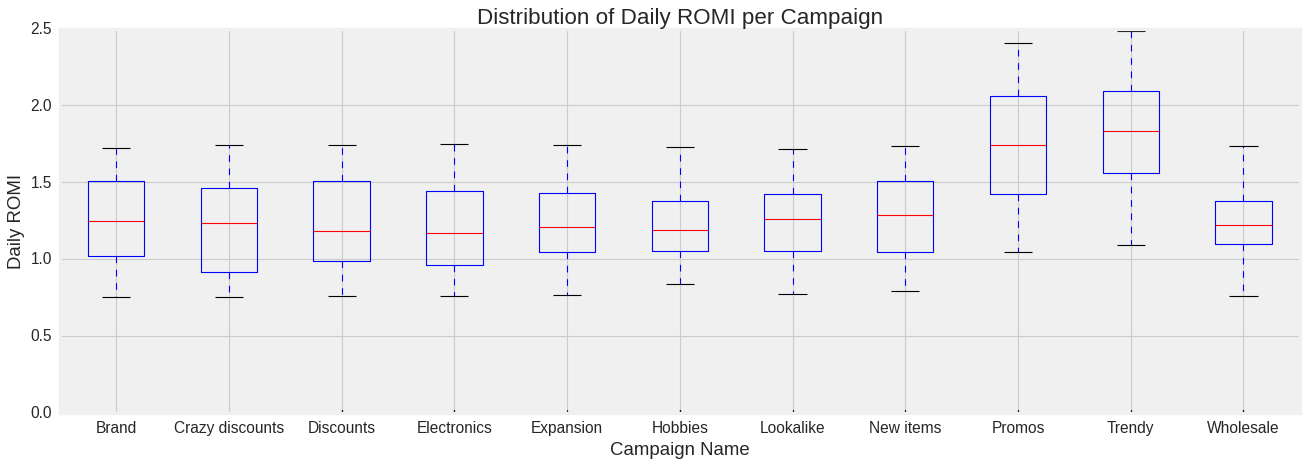

In [13]:
data_boxplot = df.groupby('campaign_name')['romi'].apply(lambda x: x.fillna(0).values)
plt.figure(figsize=(20, 6))
plt.style.use('fivethirtyeight')
plt.boxplot(data_boxplot.values, labels=data_boxplot.index)
plt.title('Distribution of Daily ROMI per Campaign')
plt.xlabel('Campaign Name')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Daily ROMI')
plt.show()

# Task: Visualize the distribution of ROMI values in the dataset using a histogram

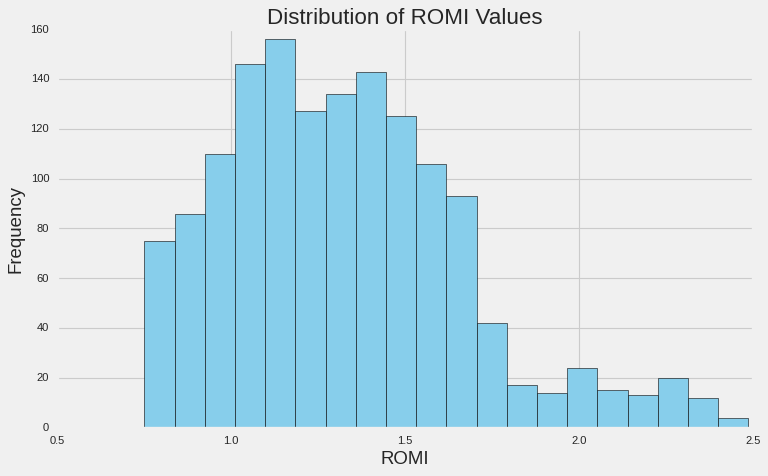

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['romi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.show()

# Task: Examine the relationship between total spend and total value using linear regression

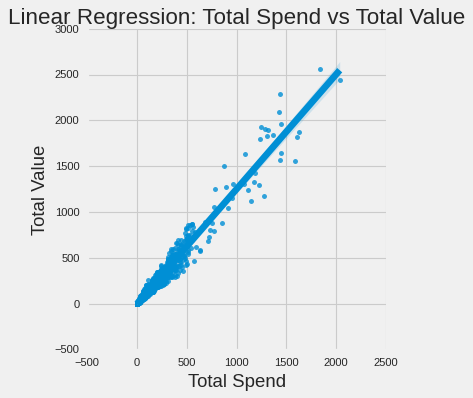

In [15]:
sns.lmplot(x='total_spend', y='total_value', data=df)
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.title('Linear Regression: Total Spend vs Total Value')
plt.show()